# PCA-based Feature Selection

This notebook applies PCA to motif features and selects the top 10%
features based on loadings of the first principal component.


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

RANDOM_SEED = 42
TOP_PC1_PERCENTILE = 0.90


In [ ]:
# Expect input CSV with samples as rows and motifs as columns

input_cav_file = r"\Infected_vs_Naive_all_newnor\data\model\07_best_model_csv\best_model_Infected_vs_Naive\Top_400_features.csv"
hits = pd.read_csv(
    input_cav_file,
    index_col="sample_name"
)

train_data = np.log2(hits.drop(columns=["label"]) + 1)


In [23]:
row_groups = pd.Series(hits["label"] == "other", index=hits.index)
row_palette = {False: "lightcoral", True: "lightgray"}
row_colors = row_groups.map(row_palette)

In [24]:
pca = PCA(random_state=RANDOM_SEED)
X_pca = pca.fit_transform(train_data)

explained_variance = pca.explained_variance_ratio_


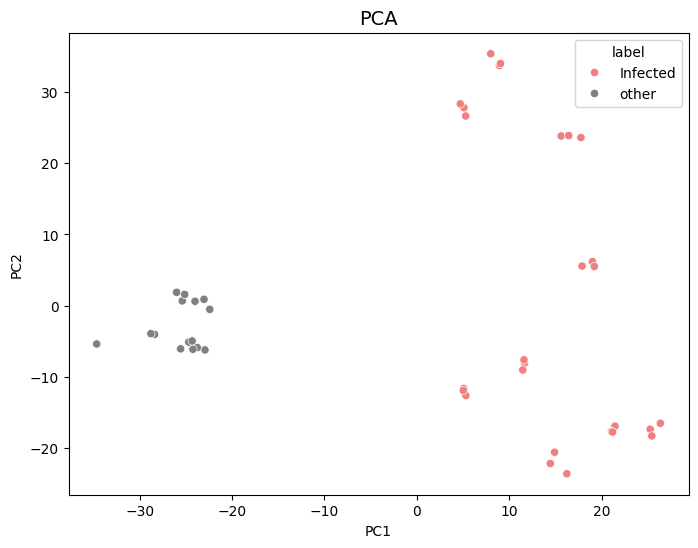

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hits['label'], palette=['lightcoral','gray'])

plt.title('PCA', fontsize=14)
plt.xlabel(f'PC1')
plt.ylabel(f'PC2')

plt.legend(title='label', loc='best')
plt.show()

In [26]:
pc1_loadings = pd.Series(
    pca.components_[0],
    index=train_data.columns
)

threshold = pc1_loadings.quantile(TOP_PC1_PERCENTILE)
selected_features = pc1_loadings[pc1_loadings >= threshold].index


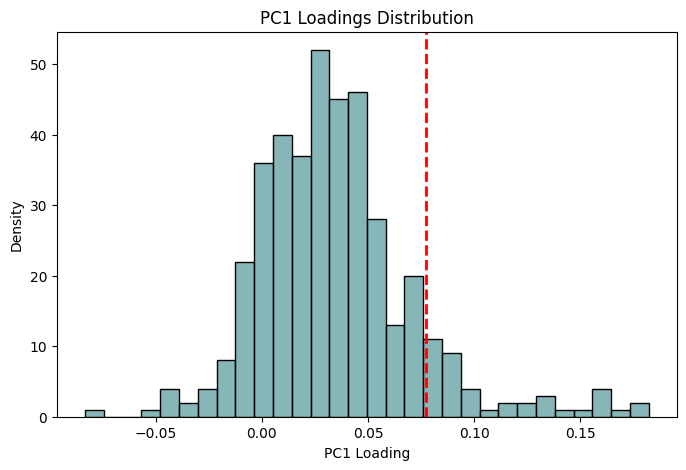

0.07715441637577217


In [28]:
# Create a distribution plot of all PC1 coefficients

plt.figure(figsize=(8, 5))
sns.histplot(pc1_loadings, bins=30, color="cadetblue")
plt.xlabel("PC1 Loading")
plt.ylabel("Density")
plt.title("PC1 Loadings Distribution")
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2)
plt.show()

print(threshold)